In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk

from bs4 import BeautifulSoup
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

from nltk.stem import LancasterStemmer, WordNetLemmatizer
# from sklearn.feature_extraction.text import TfidVectorizer
from sklearn.decomposition import PCA

In [3]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
%matplotlib inline
sns.set()

### 2.Load the dataset

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Set/Netflix_movies_and_tv_shows_clustering.csv")

In [8]:
df = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")


In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 3.Understanding the dataset

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
df.shape

(7787, 12)

In [12]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### 4. Cleaning the data

In [13]:
# Checking for the duplicate records
df.duplicated().value_counts()

False    7787
Name: count, dtype: int64

<Axes: >

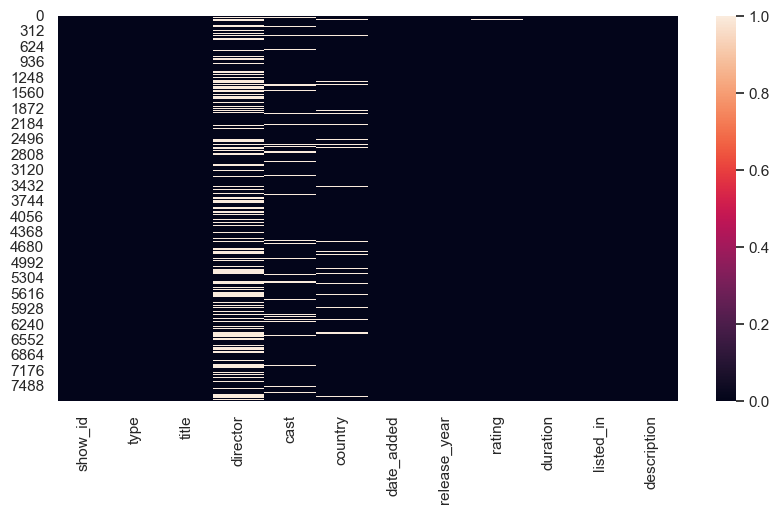

In [14]:
# Checking for the missing values and handling them
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull())

In [15]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

##### -> There are many missing values in director, cast, country, date_added and rating.

In [16]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [17]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace=True)

In [18]:
df.shape

(7777, 12)

In [19]:
# Top countries
df.country.value_counts()

country
United States                                                 2549
India                                                          923
Unknown                                                        506
United Kingdom                                                 396
Japan                                                          225
                                                              ... 
United Kingdom, South Africa, Australia, United States           1
Canada, United States, India, United Kingdom                     1
United States, Brazil, South Korea, Mexico, Japan, Germany       1
France, Lebanon, United Kingdom                                  1
United Kingdom, Jordan, Qatar, Iran                              1
Name: count, Length: 682, dtype: int64

In [20]:
# Genre of shows
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy                           1
Kids' TV, TV Comedies, TV Sci-Fi & Fantasy                                           1
Anime Series, International TV Shows, Spanish-Language TV Shows                      1
Kids' TV, Reality TV, Science & Nature TV                                            1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

In [21]:
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy                           1
Kids' TV, TV Comedies, TV Sci-Fi & Fantasy                                           1
Anime Series, International TV Shows, Spanish-Language TV Shows                      1
Kids' TV, Reality TV, Science & Nature TV                                            1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

In [22]:
# Chossing the primary country and the primary geener to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])

df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [23]:
# country in which a movie was produced
df.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Jamaica              1
Cyprus               1
Greece               1
Paraguay             1
Somalia              1
Name: count, Length: 82, dtype: int64

In [24]:
# Genere of shows
df.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Classic & Cult TV                 19
Anime Features                    19
Music & Musicals            

#### 4.4 Typecasting 'duration' from string to integer.

In [25]:
# splitting the duration column and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [26]:
# Number of seasons for tv shows
df[df['type'] == 'TV Show'].duration.value_counts()

duration
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
15       2
12       2
13       1
16       1
Name: count, dtype: int64

In [27]:
# Movie length in minutes
df[df['type'] == 'Movie'].duration.value_counts()

duration
90     136
93     131
91     125
94     125
95     119
      ... 
36       1
201      1
253      1
203      1
191      1
Name: count, Length: 201, dtype: int64

In [28]:
# Movie length with minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [29]:
# Data type of the duration
df.duration.dtype

dtype('int64')

###### We have sucessfully converted the datatype of the duration column

#### 4.5 Typecasting 'date_added' from string to date & time

In [30]:
df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7777, dtype: object

In [31]:
df['date_added'].dtype

dtype('O')

In [32]:
# Typecasting the 'date added' from string to Date & Time
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [33]:
# First and Last date on which a show is added on Netflix
df.date_added.min(), df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

###### -> The shows were added on Netflix between 1st january 2008 and 16th january 2021

In [34]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

#### 4.6 Rating :

##### The Rating can be changed to age restrictions that apply on certain movies and TV shows.

<Axes: xlabel='rating', ylabel='count'>

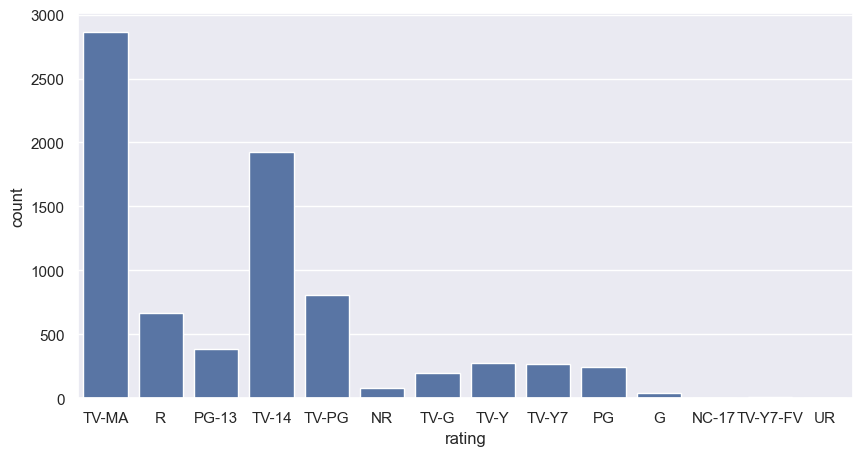

In [35]:
# Age ratings for shows in the dataset

plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df)

#### Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [36]:
# Age Rating
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [37]:
# Changing the values in the rating column
rating_map = {'TV-MA' : 'Adults',
              'R' : 'Adults',
              'PG-13': 'Teens',
              'TV-14' : 'Young Adults',
              'TV-PG' : 'Older Kids',
              'NR' : 'Adults',
              'TV-G' : 'Kids',
              'TV-Y' : 'Kids',
              'TV-Y7' : 'Older Kids',
              'PG' : 'Older Kids',
              'G' : 'Kids',
              'NC-17': 'Adults',
              'TV-Y7-FV' : 'Older Kids',
              'UR' : 'Adults'
              }


df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_22672\1435725875.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace(rating_map, inplace=True)


array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [38]:
df['rating'].head()

0    Adults
1    Adults
2    Adults
3     Teens
4     Teens
Name: rating, dtype: object

<Axes: xlabel='rating', ylabel='count'>

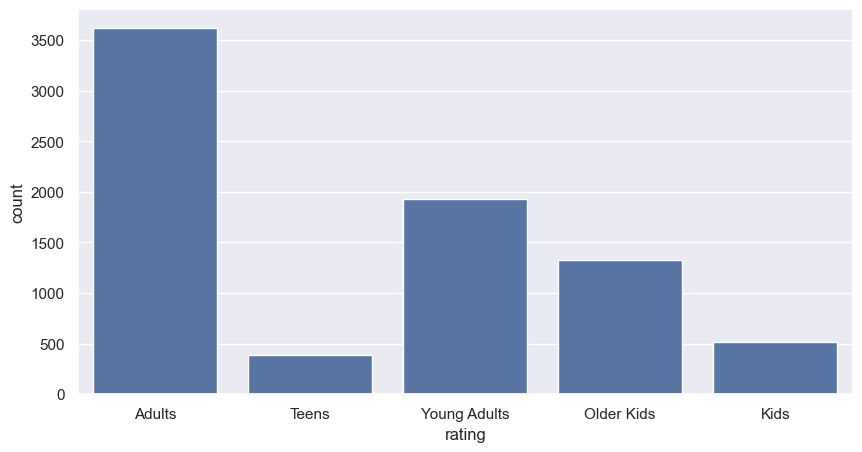

In [39]:
# Age Rating for shows in the Dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df)

##### Around 50% of shows in the Netflix are produced for adult audience. Followed by young adults, older kids and kids.

### 5.Exploratory Data Analysis

#### 5.1 Univariate Analysis

In [40]:
df.type.value_counts()

type
Movie      5377
TV Show    2400
Name: count, dtype: int64

Text(0.5, 1.0, 'Movie and Tv Shows in the dataset.')

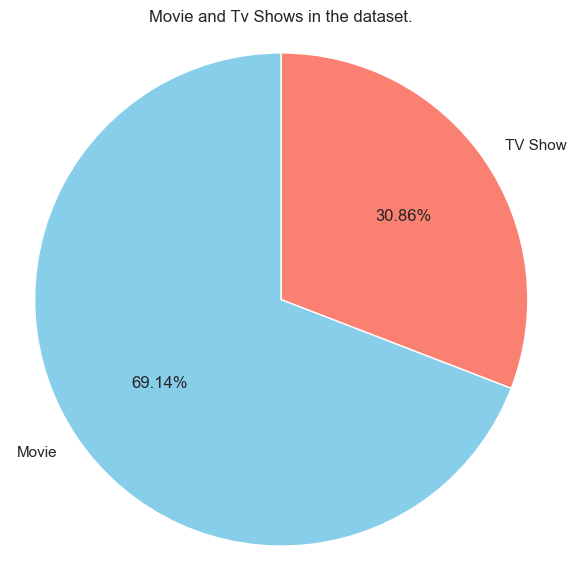

In [41]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie', autopct='%1.2f%%',startangle=90, colors=['skyblue', 'salmon'])
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Movie and Tv Shows in the dataset.')

##### There are more movies (69.14%) than TV shows (30.86%) in the dataset.

In [42]:
df[~(df['director']=='Unknown')].director.value_counts()

director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
                          ..
Sam Upton                  1
Victor Zarcoff             1
Khaled Youssef             1
Ryan Koo                   1
Jorge Michel Grau          1
Name: count, Length: 4049, dtype: int64

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

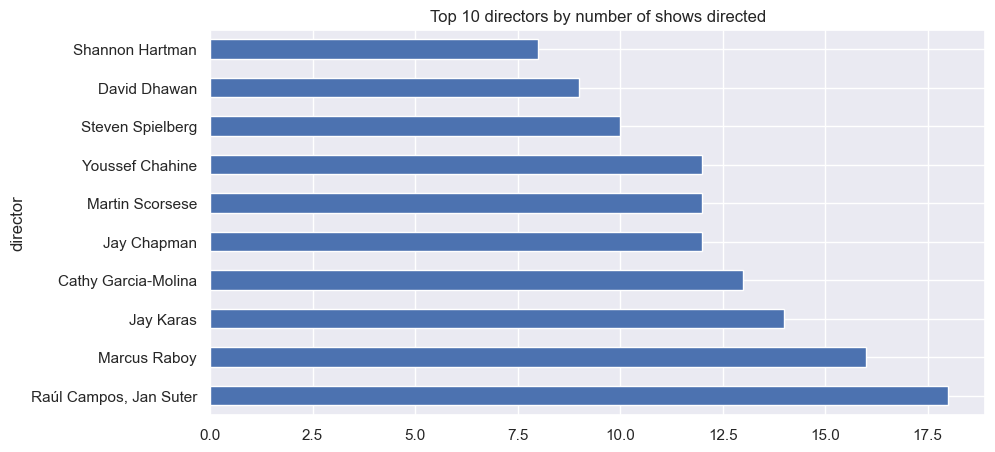

In [43]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title("Top 10 directors by number of shows directed")

#### -> Raul Campus and jan Suter togeather have directed 18 movies/TV shows, higher than any one in the dataset.

In [44]:
df[~(df['country'] == 'Unknown')].country.value_counts().nlargest(10)

country
United States     2877
India              956
United Kingdom     576
Canada             259
Japan              236
France             196
South Korea        194
Spain              168
Mexico             123
Australia          107
Name: count, dtype: int64

<Axes: ylabel='country'>

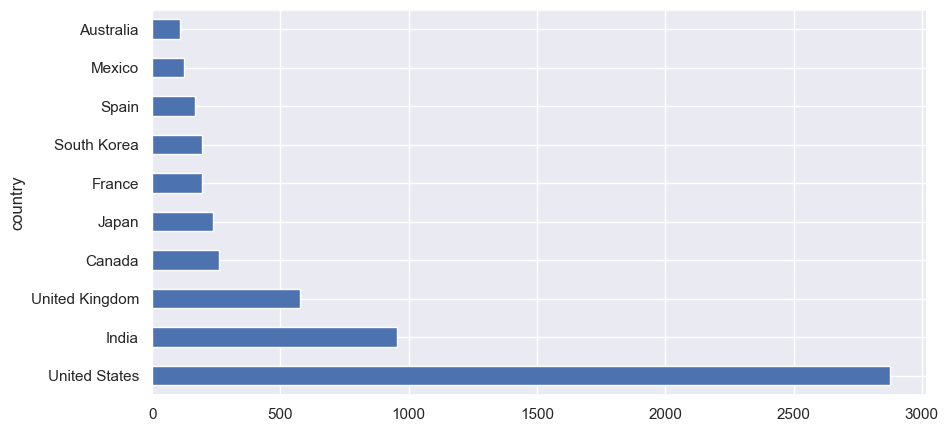

In [45]:
# Top 10 countries with the highest number of movies/TV shows in the dataset.
plt.figure(figsize=(10,5))
df[~(df['country'] == 'Unknown')].country.value_counts().nlargest(10).plot(kind='barh')

#### The highest number of movies/ TV shows were based out of US, Followed by india and UK

In [46]:
# % share of movies/tv shows by top 3 countries.
df.country.value_counts().nlargest(3).sum()/len(df)*100

np.float64(56.69281213835669)

In [47]:
# % share of movies or tv shows by top 10 country
df.country.value_counts().nlargest(10).sum()/len(df)*100

np.float64(78.32068921177832)

#### . The top countries togeather account for about 56% of all movies and TV shows in the dataset
#### . The value increases about 78% for top 10 countries.

Text(0.5, 1.0, 'Distribution by the released year')

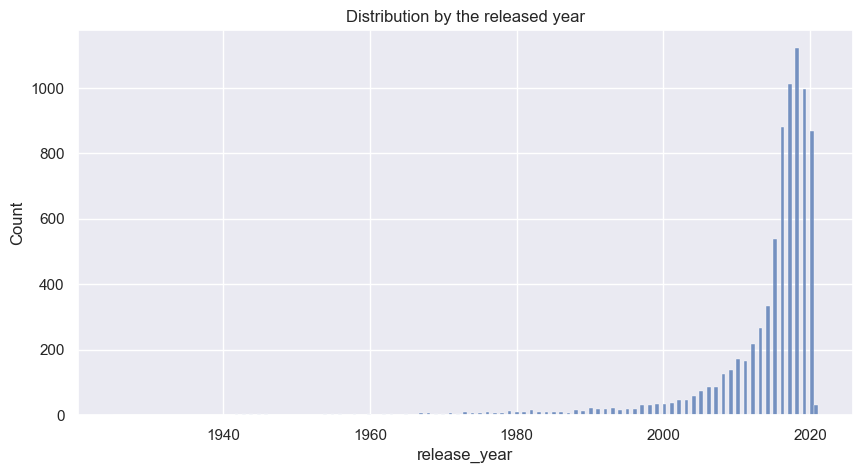

In [48]:
# Visualizing the year in which the movie / tv shows are released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title("Distribution by the released year")


#### Netflix has greater number of new movies/tv shows than the old ones


Text(0.5, 1.0, 'Top 10 Genere')

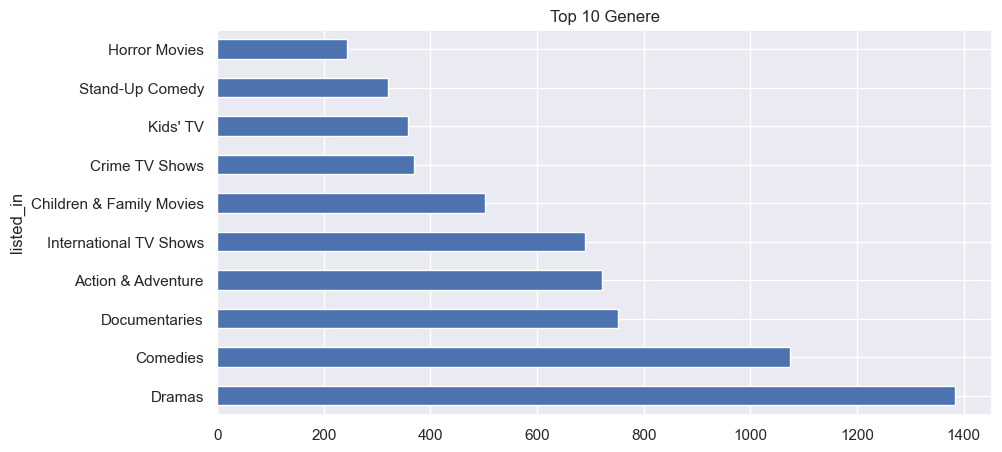

In [49]:
# Top 10 Generes
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title("Top 10 Genere")

In [50]:
df.listed_in.value_counts().nlargest(10)

listed_in
Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       689
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     357
Stand-Up Comedy              321
Horror Movies                244
Name: count, dtype: int64

In [51]:
# Share of top 3 generes
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

np.float64(41.26269769834126)

In [52]:
# Share of Top 10 generes
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

np.float64(82.44824482448246)

The dramas are the most popular genere followed by comodies and documentaries.

These three genres account for about 41% of all movies and the tv shows.

This value increases to about 82% for top 10 genres.

In [53]:
df['month_added'].value_counts()

month_added
12.0    817
10.0    780
1.0     746
11.0    730
3.0     661
9.0     614
8.0     612
4.0     596
7.0     592
6.0     538
5.0     537
2.0     466
Name: count, dtype: int64

<Axes: ylabel='month_added'>

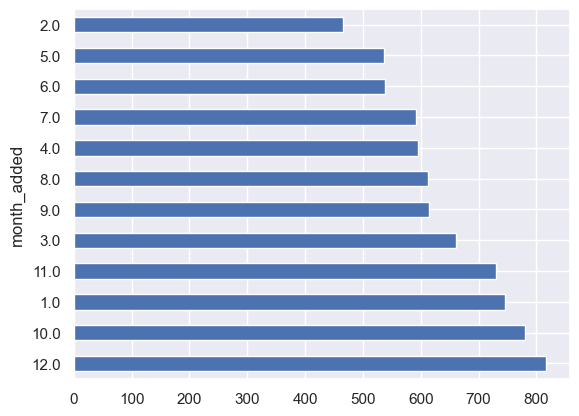

In [54]:
df.month_added.value_counts().plot(kind='barh')

Over the years a greater no of shows were added in the months of october November, December And January.

In [55]:
df['month_added'].value_counts()

month_added
12.0    817
10.0    780
1.0     746
11.0    730
3.0     661
9.0     614
8.0     612
4.0     596
7.0     592
6.0     538
5.0     537
2.0     466
Name: count, dtype: int64

Netflix continuous to add more shows on its platform over the years

There is a decrease in no of shows added in the 2020, which might be attributed  to the covid-19-induced lockdowns, which halted the creation of shows.

We have the Netflix dataonly up to 16th january 2021 , Hence there is a less movies added in this year.

In [56]:
type(df.rating.value_counts())

pandas.core.series.Series

Text(0.5, 1.0, 'No of shows in the netflix for different age groups')

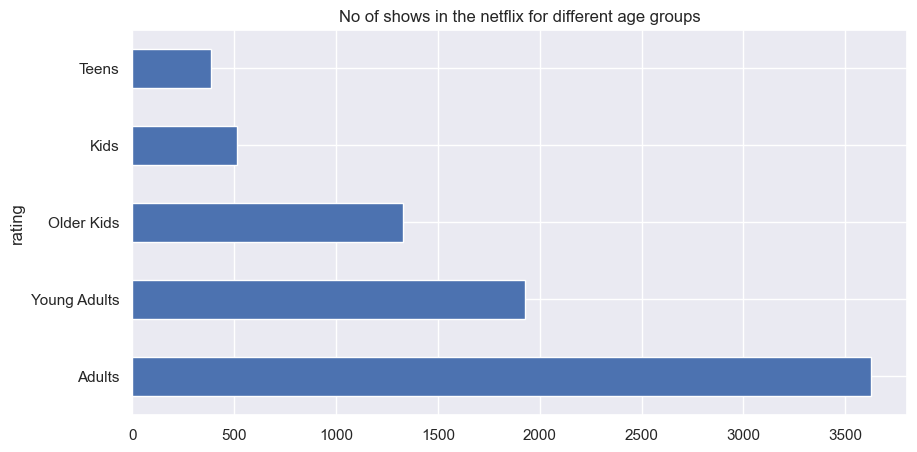

In [57]:
# Number of shows on netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title("No of shows in the netflix for different age groups")

5.2 Bivariate Analysis

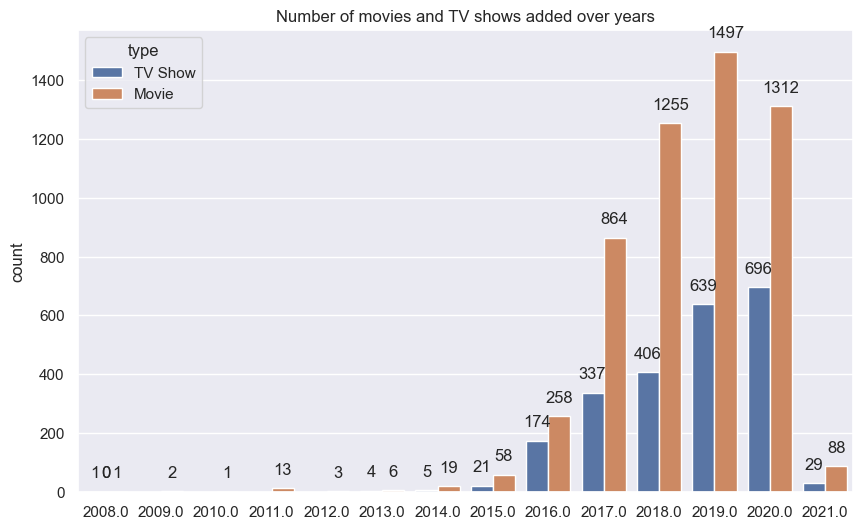

In [58]:
# Number of movies and tv shows added over the years
plt.figure(figsize=(10,6))
p = sns .countplot(x='year_added', data=df, hue='type')
plt.title('Number of movies and TV shows added over years')
plt.xlabel('')
for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2., i.get_height()), ha = 'center', xytext=(0,10), textcoords='offset points')

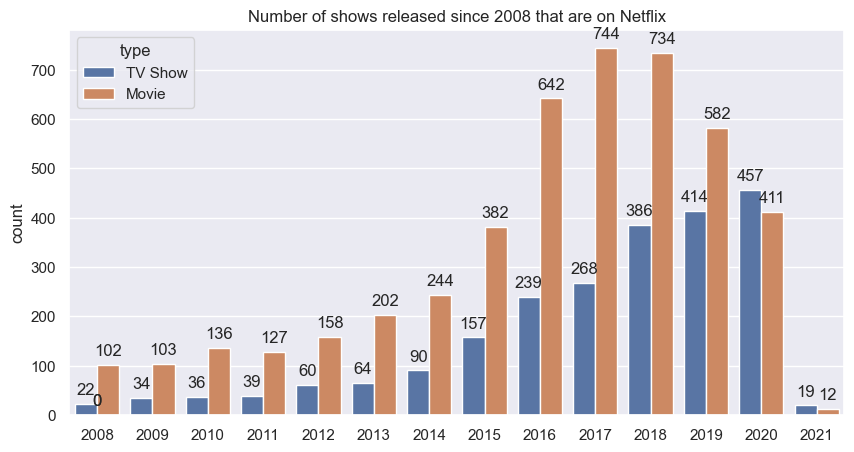

In [59]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year', data=df, hue='type', order=order)
plt.title('Number of shows released since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
    p.annotate(format(i.get_height(),'.0f'), (i.get_x() + i.get_width()/2., i.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')

Overs the years, Netflix has consistently focused on adding more shows in its platform.

Though there was a decreaase in the no of movies added in 2020, this pattern did not exist in the no of tv shows added in the same year.

This might signal that Netflix increasingly concentrating on introducing more tv series to its platform rather than movies.

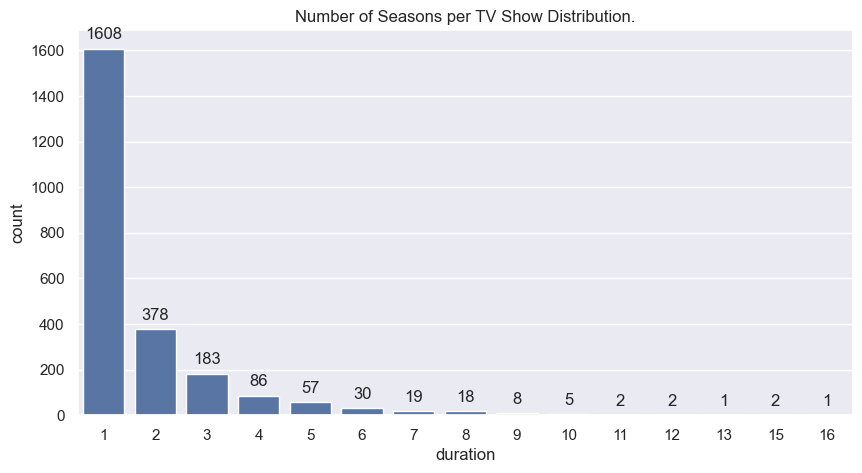

In [60]:
# Seasons in each TV shows
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration', data=df[df['type']=='TV Show'])
plt.title("Number of Seasons per TV Show Distribution.")

for i in p.patches:
    p.annotate(format(i.get_height(),'.0f'), (i.get_x() + i.get_width()/2., i.get_height()), ha = 'center', va = 'center', xytext=(0,10), textcoords='offset points' )

In [61]:
df['duration'].value_counts()

duration
1      1608
2       378
3       184
90      136
93      131
       ... 
36        1
201       1
253       1
203       1
191       1
Name: count, Length: 206, dtype: int64

In [62]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0


In [63]:
# % of TV shows with just 1 seasons.
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])*100


67.0



*   The Tv series in the dataset have upto 16 seasons, however bulk of them only have one. This might mean that the majority of the tv shows has only recently beagun, and that further seasons are on the way.
*   There are few tv shows that have more than 8 seasons.



Text(0.5, 1.0, 'Movie duration distribution')

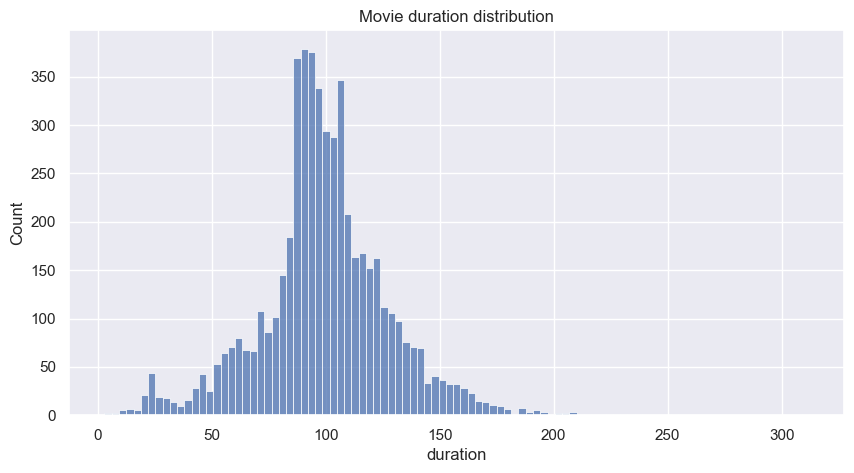

In [64]:
# Length of movie analysis.
plt.figure(figsize=(10,5))
sns.histplot(x='duration', data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [65]:
df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

In [66]:
# Movie statistics
df[df['type']=='Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

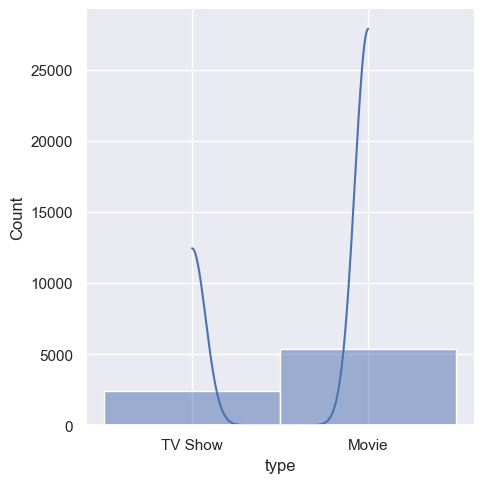

In [67]:
sns.displot(df,x='type',kde=True)

*  The length of the movies may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

In [68]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2005,Adults,99,Dramas,When Lebanon's Civil War deprives Zozo of his ...,10.0,2020.0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,Young Adults,111,Dramas,A scrappy but poor boy worms his way into a ty...,3.0,2019.0
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,Adults,44,Documentaries,"In this documentary, South African rapper Nast...",9.0,2020.0
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2019,Older Kids,1,International TV Shows,Dessert wizard Adriano Zumbo looks for the nex...,10.0,2020.0


In [69]:
#Building a word cloud for the movie descriptions
comment_words = ""
stopwords=set(STOPWORDS)

# Iterate through the csv filter
for val in df.description.values:

    # Type cast each value to string
    val=str(val)

    #Split the value
    tokens=val.split()

    # Converts each token the lower case
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        comment_words+=" ".join(tokens)+" "

word_cloud=WordCloud(width=700,height=700,
                    background_color='white',
                    stopwords=stopwords,
                    min_font_size=10
                      ).generate(comment_words)

#plot the word loud image
plt.figure(figsize=(10,5),facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)


KeyboardInterrupt: 

* Some keywords in the netflix shows in the description: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

## 6.Data Preprocessing

In [70]:
# Using the original dataset for the clustering since it doesnot require handling of the missing values.
df1 = df.copy()

In [ ]:
df1.fillna('',inplace=True)

<ipython-input-71-c75afd27a141>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.fillna('',inplace=True)


In [ ]:
# Combining all the clustering attributes in to a single column

df1['clustering_attributes'] = (df['director']+ " "+
                                df1['cast'] + " " +
                                df1['country'] + " " +
                                df1['listed_in'] + " " +
                                df1['description']
                                )

In [ ]:
df1

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,clustering_attributes
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0,"Unknown João Miguel, Bianca Comparato, Michel ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0,"Jorge Michel Grau Demián Bichir, Héctor Bonill..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0,"Gilbert Chan Tedd Chan, Stella Chung, Henley H..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0,"Shane Acker Elijah Wood, John C. Reilly, Jenni..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,"Robert Luketic Jim Sturgess, Kevin Spacey, Kat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2005,Adults,99,Dramas,When Lebanon's Civil War deprives Zozo of his ...,10.0,2020.0,"Josef Fares Imad Creidi, Antoinette Turk, Elia..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,Young Adults,111,Dramas,A scrappy but poor boy worms his way into a ty...,3.0,2019.0,"Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra..."
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,Adults,44,Documentaries,"In this documentary, South African rapper Nast...",9.0,2020.0,Unknown Nasty C Unknown Documentaries In this ...
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2019,Older Kids,1,International TV Shows,Dessert wizard Adriano Zumbo looks for the nex...,10.0,2020.0,"Unknown Adriano Zumbo, Rachel Khoo Australia I..."


In [ ]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* We have sucessfully added all the columns.

### 6.1 Removing all the non ASCII Character.

In [ ]:
# function to remove all the non ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][40]


'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

### 6.3. Remove stopwords and lower case:

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
df1['clustering_attributes'][40]


'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall.'

* We have successfully removed all the stopwords and converted the corpus to lowercase.

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)
X

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 222432 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of X
X.shape

(7777, 20000)

In [ ]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# convert X into array form for clustering
X = X.toarray()

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

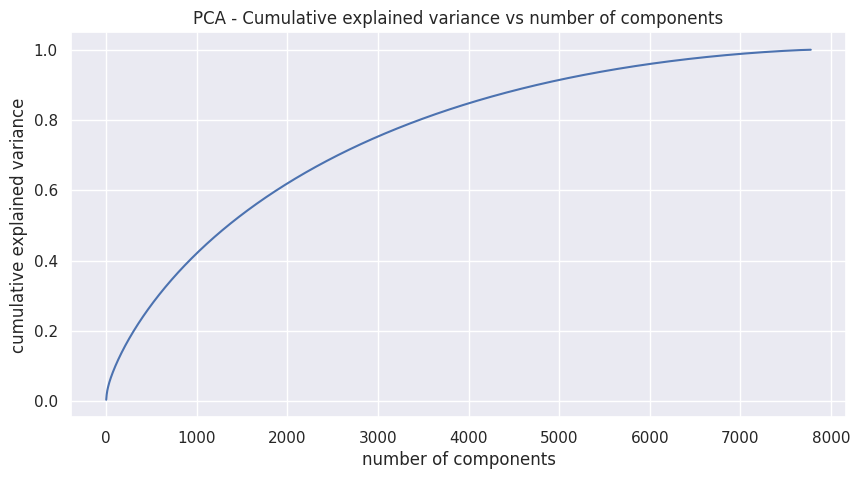

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that 100% of the variance is explained by about ~7500 components.
Also, more than 80% of the variance is explained just by 4000 components.
Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7777, 4000)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'WCSS')

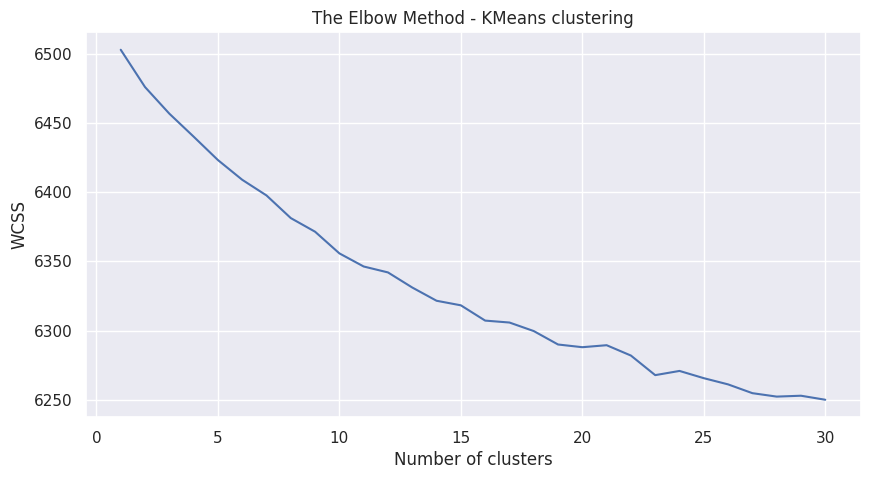

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))
plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

In [ ]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)